Luis Adolfo Martínez Ortiz
Carné:
**22000352** 

**Practica 2 AnomalyDetection**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
import random
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [ ]:
import os.path
from os import path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
direccion = "/content/drive/MyDrive/TextMining/Archivos"
os.chdir(direccion)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
training_set = pd.read_excel('estaturas.xlsx', sheet_name=0) # datos normales 
data_tescros  = pd.read_excel('estaturas.xlsx',sheet_name=1)  # para cross-validation y testing
data_anomalias = pd.read_excel('estaturas.xlsx', sheet_name=2)# anomalias

In [ ]:
data_anomalias['Edad'][:1]= 2.4
data_anomalias['Edad'][:2]= 2.5

data_anomalias['Edad']= data_anomalias['Edad'].astype(float)
training_set.to_numpy()
data_tescros.to_numpy()
data_anomalias.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[  0.25,   2.5 ],
       [175.1 ,   2.5 ],
       [  0.15, 250.  ],
       [150.  ,  14.  ]])

In [ ]:
prueb_y = np.zeros(len(data_tescros))
anom_y  = np.ones(len(data_anomalias))

In [ ]:
#print(data.dtypes)
#data[['Estatura']]= data[['Estatura']].astype(float)

In [ ]:
data_anomalias_u = np.append(training_set,data_anomalias, axis=0)    #agregamos datos del training conel de anomalias
data_test = np.append(training_set,data_tescros, axis=0)    #agregamos datos del training con el de test

In [ ]:
def mediaCov(df):
   me = np.mean(df,axis=0)
   cov = np.cov(df.T)
   return me, cov

In [ ]:
def multivariateGaussian(df,me,cov):
  #mu = np.mean(df,axis=0)
  #sigma = np.cov(df.T)
  p = multivariate_normal(mean=me, cov=cov)
  return p.pdf(df)

In [ ]:
def umbral(proba,arr):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(proba) - min(proba)) / 2000
    epsilons = np.arange(min(proba),max(proba),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (proba < epsilon) 
        f = f1_score(arr, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

Pruebas con datos **normales + valtest**

In [ ]:
me, cov = mediaCov(data_test)
p = multivariateGaussian(data_test,me,cov)


In [ ]:
p_cv = multivariateGaussian(data_tescros,me,cov)
fscore, ep = umbral(p_cv,prueb_y)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
# seleccion de anomalias
outliers = np.asarray(np.where(p < ep))
outliers

array([], shape=(1, 0), dtype=int64)

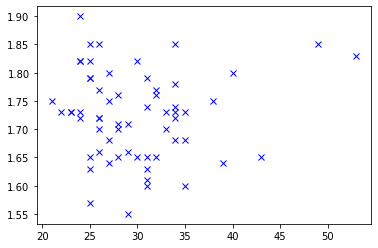

In [ ]:
plt.figure()
plt.plot(data_test[:,1],data_test[:,0],'bx')
plt.plot(data_test[outliers,1],data_test[outliers,0],'ro')
plt.show()
# No hay anomilias

**Pruebas conn datos Valtest(anomalias)**

In [ ]:
me, cov = mediaCov(data_anomalias_u)
resu = multivariateGaussian(data_anomalias_u,me,cov)

In [ ]:
p_cv = multivariateGaussian(data_anomalias,me,cov)
fscore, ep = umbral(p_cv,anom_y)

print(ep)

5.020587711702626e-08


In [ ]:
# seleccion de anomalias
outliers = np.asarray(np.where(resu < ep))
outliers

array([[54, 55, 56]])

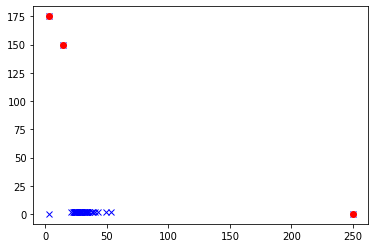

In [ ]:
plt.figure()
plt.plot(data_anomalias_u[:,1],data_anomalias_u[:,0],'bx')
plt.plot(data_anomalias_u[outliers,1],data_anomalias_u[outliers,0],'ro')
plt.show()

**Anomalias :**

In [ ]:
data_anomalias_u[outliers]

array([[[175.1 ,   2.5 ],
        [  0.15, 250.  ],
        [150.  ,  14.  ]]])

**Conclusiones**

Para obtener las anomalias del dataset resulto necesario entrenar nuestro modelo con datos normales sin anomalias y con datos que presentaban anomalias. Con esto logramos un modelo para la deteccion de datos anomalos.